In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
import pylab
import scipy as sp
import matplotlib.patches as mpatches
from drift.core import manager
from scipy.sparse import lil_matrix
import sys
sys.path.insert(0,'/home/zahra/PIPELINE')
from log_red_cal_new import Visibilities_grid, A_matrix, colour_scatterplot, Bls_counts, Scatterplot

In [2]:
ts_2=h5py.File('/home/zahra/PIPELINE/5by5_dishvar_pt1/draco_synthesis/maps/tstream_2.h5','r')
ag_2=h5py.File('/home/zahra/PIPELINE/5by5_dishvar_pt1/draco_synthesis/rand_gains/amp_phase/app_gain_2.h5','r')
rg_2=h5py.File('/home/zahra/PIPELINE/5by5_dishvar_pt1/draco_synthesis/rand_gains/sig_2.h5','r')

gn_2=h5py.File('/home/zahra/PIPELINE/5by5_dishvar_pt1/draco_synthesis/rand_gains/ts_final/app_gain_noise_2.h5','r')


In [3]:
time_channel=400
after_gain=ag_2
rand_gain=rg_2
Ndish=25
avg_reals=30

m=manager.ProductManager.from_config('/media/zahra/DATA/example_5by5_lmax_200_no_scatter/prod_params_custom.yaml')

m_scatter = manager.ProductManager.from_config('/media/zahra/DATA/5by5_dishvar_trial2/prod_params_custom.yaml')

t=m.telescope
meas_vis, meas_vis_no_noise, meas_vis_gnoise, true_vis, N_comp, x_rec_real, x_rec_real_no_noise, x_true_real, x_rec_real_gnoise, x_rec_imag, x_rec_imag_no_noise, x_true_imag, x_rec_imag_gnoise, error_gnoise, error_gnoise_imag, error, error_imag, sigma_gn=Visibilities_grid(m,ts_2,rand_gain,after_gain,gn_2,time_channel, 50, 1)

meas_vis_no_noise_scatter, meas_vis_gnoise_scatter=Visibilities_grid(m_scatter,ts_2,rand_gain,after_gain,gn_2,time_channel, 50, 1)[1], Visibilities_grid(m_scatter,ts_2,rand_gain,after_gain,gn_2,time_channel, 50, 1)[2]

Product directory: /media/zahra/DATA/example_5by5_lmax_200_no_scatter/bt_matrices
Product directory: /media/zahra/DATA/5by5_dishvar_trial2/bt_matrices
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')
(0.012207031977595827, 'sigma_gn')


[2.40445241 2.41507523 2.424291   2.4458525  2.45906223 2.46317812
 2.46812456 2.4746543  2.47745296 2.49191882 2.50144156 2.50476176
 2.50609298 2.53973298 2.56982713 2.57494865 2.59568414 2.60452494
 2.68227838 2.69629505 2.70036857 2.70258844 2.75202685 3.0543282
 3.22998975]


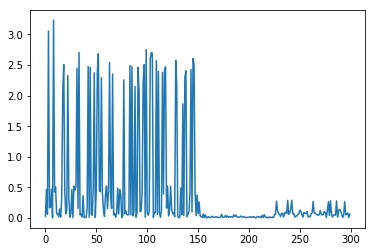

In [4]:
abs_meas_vis_gnoise_scatter=np.abs(meas_vis_gnoise_scatter[:,time_channel])
where=np.where(abs_meas_vis_gnoise_scatter>2.4)
print np.sort(abs_meas_vis_gnoise_scatter[where])
plt.plot(np.abs(meas_vis_gnoise_scatter[:,time_channel]))
plt.show()

[2.40445241 2.41507523 2.424291   2.4458525  2.45906223 2.46317812
 2.46812456 2.4746543  2.47745296 2.49191882 2.50144156 2.50476176
 2.50609298 2.53973298 2.56982713 2.57494865 2.59568414 2.60452494
 2.68227838 2.69629505 2.70036857 2.70258844 2.75202685 3.0543282
 3.22998975]


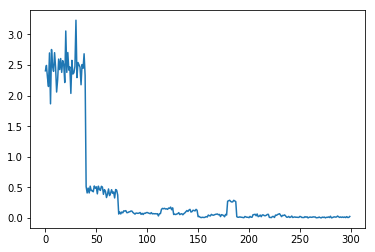

In [5]:
abs_meas_vis_gnoise = np.abs(meas_vis_gnoise[:,time_channel])
where=np.where(abs_meas_vis_gnoise>2.4)
print np.sort(abs_meas_vis_gnoise[where])

plt.plot(np.abs(meas_vis_gnoise[:,time_channel]))
plt.show()

In [6]:
print (A_matrix(m)[0].shape,'A')
print Bls_counts(m), 'Bls counts'


((300, 65), 'A')
(array([[ 0.,  1.],
       [ 1.,  2.],
       [ 2.,  3.],
       [ 3.,  4.],
       [ 5.,  6.],
       [ 6.,  7.],
       [ 7.,  8.],
       [ 8.,  9.],
       [10., 11.],
       [11., 12.],
       [12., 13.],
       [13., 14.],
       [15., 16.],
       [16., 17.],
       [17., 18.],
       [18., 19.],
       [20., 21.],
       [21., 22.],
       [22., 23.],
       [23., 24.],
       [ 0.,  5.],
       [ 1.,  6.],
       [ 2.,  7.],
       [ 3.,  8.],
       [ 4.,  9.],
       [ 5., 10.],
       [ 6., 11.],
       [ 7., 12.],
       [ 8., 13.],
       [ 9., 14.],
       [10., 15.],
       [11., 16.],
       [12., 17.],
       [13., 18.],
       [14., 19.],
       [15., 20.],
       [16., 21.],
       [17., 22.],
       [18., 23.],
       [19., 24.],
       [ 1.,  5.],
       [ 2.,  6.],
       [ 3.,  7.],
       [ 4.,  8.],
       [ 6., 10.],
       [ 7., 11.],
       [ 8., 12.],
       [ 9., 13.],
       [11., 15.],
       [12., 16.],
       [13., 17.],
       [14., 

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1.]
0.8271526467270147 1.154107195875355


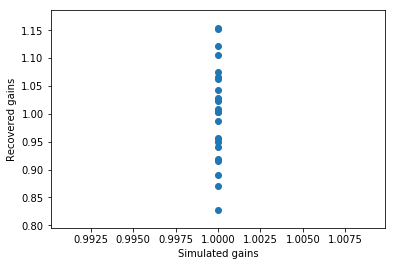

In [7]:
print np.exp(x_true_real[:Ndish,time_channel])
print np.exp(x_rec_real_gnoise[:Ndish,time_channel]).min(), np.exp(x_rec_real_gnoise[:Ndish,time_channel]).max()

fig, ax = plt.subplots()


ax.scatter(np.exp(x_true_real[:Ndish,time_channel]),np.exp(x_rec_real_gnoise[:Ndish,time_channel]))
#ax.plot(lims, lims,'g')
#plt.errorbar(x_true_real[:Ndish,time_channel],x_rec_real[:Ndish,time_channel],xerr=None,yerr=error[:Ndish],linestyle="None")
plt.xlabel('Simulated gains')
plt.ylabel('Recovered gains')
#plt.ylim(-lim,lim)
#plt.xlim(-lim,lim)
plt.show()